<a href="https://colab.research.google.com/github/yodavo/IAI_vaccines/blob/main/3.Modelamiento_NoSupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kneed

# Para importar la data
import os

# Importar para manipulacion de datos
import numpy as np
import pandas as pd
import datetime as dt
from statistics import *

# Importar para Visualizacion 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sns.set(style="ticks", context='talk', palette='rainbow')
import warnings # para evitar warnings
warnings.filterwarnings('ignore')
import textwrap
from textwrap import wrap
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Importar Dependencias
%matplotlib inline
# %load_ext google.colab.data_table

# Machine Learning
from mpl_toolkits import mplot3d
import seaborn as sns
from kneed import KneeLocator
from sklearn.cluster import KMeans

In [88]:
 from google.colab import drive
drive.mount('/content/drive')

# Entrando a la carpeta de trabajo
%cd '/content/drive/MyDrive/Colab Notebooks/Diplomado-UTEC/Modulo5/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Diplomado-UTEC/Modulo5/dataset


In [90]:
# importar de VAERSData
data = pd.read_csv('dataset_aesi(final).csv', index_col=0, encoding='latin-1')
print(f'VAER Pfizer-Hospitalized Data tiene\t: {data.shape[0]} observaciones y {data.shape[1]} variables.')

VAER Pfizer-Hospitalized Data tiene	: 2210 observaciones y 42 variables.


In [79]:
# eliminando datos que no aportan
data.reset_index(inplace=True)
# eliminando datos que no aportan
data.drop(["VAERS_ID","recvdate","vax_lot"], axis = 1, inplace=True)
print(f'El dataset tiene\t: {data.shape[0]} observaciones y {data.shape[1]} variables.')

El dataset tiene	: 2210 observaciones y 40 variables.


In [75]:
# revisando cantidad de aesis
aesis =  ['infarct_myocardic', 'coagulopathy', 'anaphylactic',
       'myocarditis_pericarditis', 'epilepsy_convulsions', 'covid19',
       'guillain', 'polyneurapathy', 'multisystem', 'narcolepsia', 'pregnancy',
       'stroke', 'transverse_myelitis', 'autoimmuned', 'adem',
       'multipleesclerosis', 'opticneuritis', 'cidp', 'encephalitis',
       'myelitis', 'encephalomyelitis', 'meningitis', 'encephalopathy',
       'ataxia', 'noanaphylactic']

In [80]:
## Variables categóricas binarias convertidas a 0 y 1
data['sex']=data['sex'].apply(lambda x : 0 if x == 'M' else 1) ## 0 para Maculinos , 1 para Femenino
data['died']=data['died'].apply(lambda x : 0 if x == 'N' else 1) ## 0 para N "NO FALLECIDO" , 1 para Y "FALLECIDO"

### ELIMINAR VARIABLES QUE NO SE PUEDEN REPETIR EN OTROS PAÍSES###
data.drop(['state', 'v_adminby'],axis=1 , inplace=True)

In [81]:
### VARIABLES CATEGÓRICAS DEFINIDAS ###
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data['vax_route'] = ord_enc.fit_transform(data[['vax_route']]).astype(int)
data['vax_site'] = ord_enc.fit_transform(data[['vax_site']]).astype(int)

In [82]:
# conversion de fechas
data['vax_date'] =  data['vax_date'].apply(pd.to_datetime, format='%Y-%m-%d')
data['onset_date'] =  data['onset_date'].apply(pd.to_datetime, format='%Y-%m-%d')

## Creacion de una nueva variable a partir de las fechas de vacuancion y presencia de efectos adversos
data['onset_vax'] = (data['onset_date'] - data['vax_date']).astype('timedelta64[D]').astype('int')

In [83]:
# coreciones manuales, en el mayor de los casos las fechas estan invertdas
data['onset_vax'] = np.where(data['onset_vax'] < 0, data['onset_vax']*-1, data['onset_vax'])

In [84]:
# eliminamos variables de fechas
data.drop(columns= ['vax_date', 'onset_date'], inplace=True)

#reordenamos la base de datos
data = data[['vax_dose_series', 'vax_route', 'vax_site', 'onset_vax',
       'age_yrs', 'sex', 'er_ed_visit', 'l_threat', 'disable', 'died',
       'hospdays', 'recovd', 'infarct_myocardic', 'coagulopathy',
       'anaphylactic', 'myocarditis_pericarditis', 'epilepsy_convulsions',
       'covid19', 'guillain', 'polyneurapathy', 'multisystem', 'narcolepsia',
       'pregnancy', 'stroke', 'transverse_myelitis', 'autoimmuned', 'adem',
       'multipleesclerosis', 'opticneuritis', 'cidp', 'encephalitis',
       'myelitis', 'encephalomyelitis', 'meningitis', 'encephalopathy',
       'ataxia', 'noanaphylactic']]

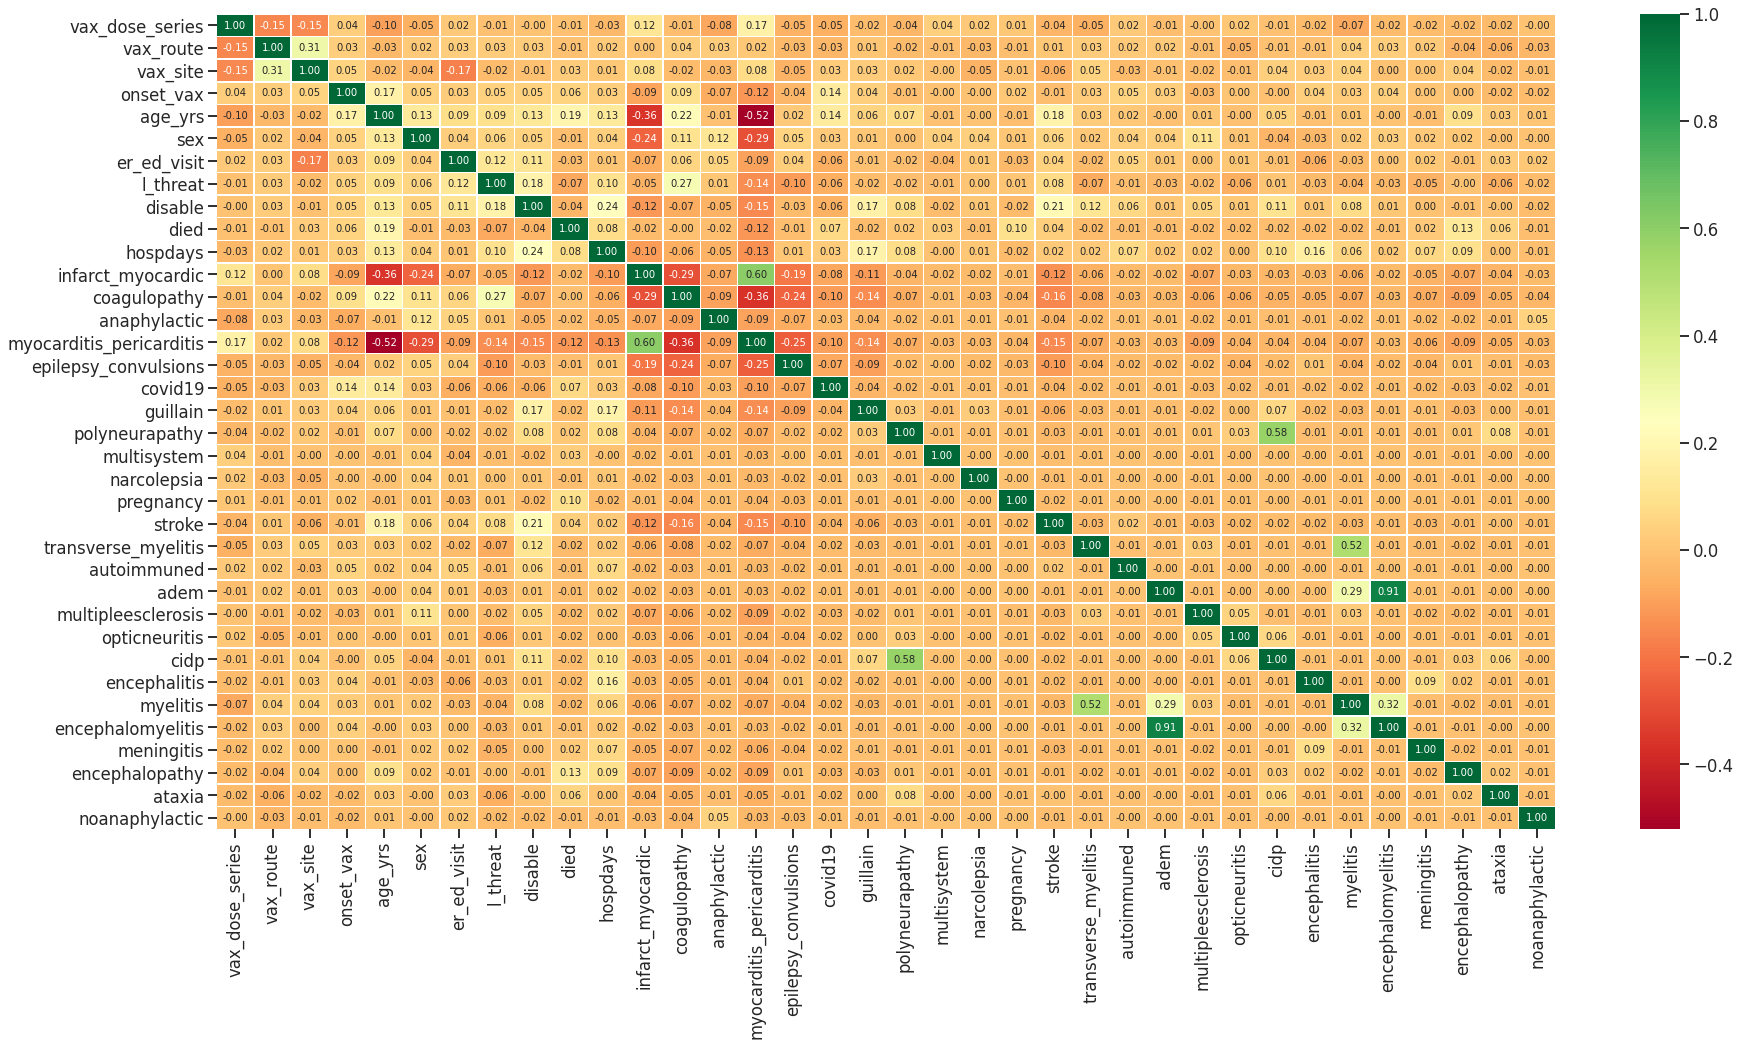

In [85]:
#Correlación de variables
corr = data.corr()
sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(30, 15)
plt.show()

In [ ]:
#Me ganó el sueño aajja